# Ensemble Learning for Multi-Class ECG Heartbeat Categorization - Supervised Learning Project
#### Aqsa Anwar
#### 27th-Aug-2024
**[GitHub Repository](https://github.com/aqsaakhan/CSCA-5622-Supervised-Learning-Final-Project)**

## 1. Introduction
This project serves as the final project for my **['Introduction to Machine Learning: Supervised Learning'](https://github.com/aqsaakhan/CSCA-5622-Supervised-Learning-Final-Project/blob/main/Final%20Project.ipynb)** course. In this project I aim to develop a model that could potentially assist in the early detection of cardiac abnormalities, contributing to more efficient and accurate cardiac health monitoring. An ECG (Electrocardiogram) is a medical test that measures the electrical signals of the heart and is essential for diagnosing many heart related diseases. A healthy individual's heartbeat on an ECG is characterized by a distinctive waveform, representing the normal functioning of the heart.

However, when the heart is not functioning optimally, the ECG detects distortions to the anticipated waveform, and severe and life-threatening arrhythmias might present a different or nonexistent waveform altogether.
### 1.1 Dataset Overview
The **[ECG Heartbeat Categorization Dataset](https://www.kaggle.com/datasets/shayanfazeli/heartbeat)**  is a comprehensive collection of electrocardiogram (ECG) signals, designed for the classification of heartbeats. This dataset is derived from two renowned sources in the field of heartbeat classification:

MIT-BIH Arrhythmia Dataset:

- Contains 109,446 samples
- Categorized into 5 classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
- Sampling frequency: 125Hz


The PTB Diagnostic ECG Database:

- Contains 14,552 samples
- Categorized into 2 classes (normal and abnormal)
- Sampling frequency: 125Hz

All samples in the dataset have been preprocessed: they are cropped, downsampled, and padded with zeros to a fixed dimension of 188 data points. This preprocessing ensures uniformity across all samples.
The dataset is split into four CSV files:

- mitbih_train.csv
- mitbih_test.csv
- ptbdb_abnormal.csv
- ptbdb_normal.csv

Each row in these CSV files represents a single heartbeat, with the last column indicating the class label.

### 1.2 Project Objectives
The main objectives of this project are:

- **Data Exploration (EDA):** To gain in-depth insights into the ECG signal patterns across different heartbeat categories.
- **Data Cleaning, Data Preprocessing and Feature Engineering:** To prepare the data for machine learning models, including handling any data quality issues and creating relevant features.
- **Model Development:** We'll develop various models including Logistic Regression, Random Forest, XGBoost, and Ensemble Model(Random Forest and XGBoost)
- **Hyperparameter Tuning:** We'll also hypertune our best performing model to further optimze it's perfomance.
- **SMOTE Analysis:** We'll also perform SMOTE analysis combined with our ensemble method.
- **Model Evaluation and Comparison:** To assess the performance of different models in classifying heartbeats and identify the most effective approach.
- **Practical Application:** To develop a model that could potentially assist in the early detection of cardiac abnormalities, contributing to more efficient and accurate cardiac health monitoring.


## 2. Data Loading and Initial Exploration
### 2.1 Importing Libraries
First step, we'll start by importing neceassry python libraries

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform



### 2.2 Loading Datasets
Now that we have imported the required libraries, we'll now load our dataset

In [2]:
# Load the datasets
mitbih_train = pd.read_csv('mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('mitbih_test.csv', header=None)
ptbdb_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('ptbdb_normal.csv', header=None)

### 2.3 Initial Data Inspection
Let's take a look at the first few rows of each dataset and do some initial inspection before we move on to detailed EDA.

In [3]:
# Display the first few rows of each dataset
print("MITBIH Train Dataset:")
print(mitbih_train.head())
print("\nMITBIH Test Dataset:")
print(mitbih_test.head())
print("\nPTBDB Abnormal Dataset:")
print(ptbdb_abnormal.head())
print("\nPTBDB Normal Dataset:")
print(ptbdb_normal.head())

MITBIH Train Dataset:
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0

## 3. Data Cleaning and Preprocessing
### 3.1 Checking for Missing Values
Our first step in data cleaning is to check for any missing values in our datasets. Missing data can significantly impact our analysis and model performance, so it's crucial to identify and handle them appropriately.
We'll now check each dataset for any missing or infinity values.

In [4]:
# Function to check for missing values
def check_missing_values(df, name):
    missing = df.isnull().sum().sum()
    if missing > 0:
        print(f"{name} has {missing} missing values")
    else:
        print(f"{name} has no missing values")

# Check each dataset
check_missing_values(mitbih_train, "MITBIH Train Dataset")
check_missing_values(mitbih_test, "MITBIH Test Dataset")
check_missing_values(ptbdb_abnormal, "PTBDB Abnormal Dataset")
check_missing_values(ptbdb_normal, "PTBDB Normal Dataset")

# Additional check: are there any infinity values?
def check_infinity_values(df, name):
    infinity = np.isinf(df).values.sum()
    if infinity > 0:
        print(f"{name} has {infinity} infinity values")
    else:
        print(f"{name} has no infinity values")

# Check each dataset for infinity values
check_infinity_values(mitbih_train, "MITBIH Train Dataset")
check_infinity_values(mitbih_test, "MITBIH Test Dataset")
check_infinity_values(ptbdb_abnormal, "PTBDB Abnormal Dataset")
check_infinity_values(ptbdb_normal, "PTBDB Normal Dataset")

MITBIH Train Dataset has no missing values
MITBIH Test Dataset has no missing values
PTBDB Abnormal Dataset has no missing values
PTBDB Normal Dataset has no missing values
MITBIH Train Dataset has no infinity values
MITBIH Test Dataset has no infinity values
PTBDB Abnormal Dataset has no infinity values
PTBDB Normal Dataset has no infinity values


## 4. Exploratory Data Analysis (EDA)
### 4.1 Class Distribution Analysis
Now that we have confiremed out data quality, the next important step is to understand the distribution of classes in our datasets. This will help us identify the class imbalance if we have. As class emabalnce can impact our choice of modeling and evaluation strategies.
Let's start by examining the class distribution in the MITBIH datasets.

In [5]:
# Function to display class distribution
def display_class_distribution(df, name):
    class_counts = df.iloc[:, -1].value_counts().sort_index()
    print(f"\nClass Distribution for {name}:")
    print(class_counts)
    print("\nPercentage Distribution:")
    print(class_counts / len(df) * 100)

# Analyze MITBIH Train Dataset
display_class_distribution(mitbih_train, "MITBIH Train Dataset")

# Analyze MITBIH Test Dataset
display_class_distribution(mitbih_test, "MITBIH Test Dataset")


Class Distribution for MITBIH Train Dataset:
187
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: count, dtype: int64

Percentage Distribution:
187
0.0    82.772917
1.0     2.539005
2.0     6.610777
3.0     0.732120
4.0     7.345181
Name: count, dtype: float64

Class Distribution for MITBIH Test Dataset:
187
0.0    18118
1.0      556
2.0     1448
3.0      162
4.0     1608
Name: count, dtype: int64

Percentage Distribution:
187
0.0    82.760826
1.0     2.539741
2.0     6.614288
3.0     0.739996
4.0     7.345149
Name: count, dtype: float64


### 4.2 Class Distribution
To better understand and present the class imbalance in our MITBIH datasets, let's create bar plots of the class distribution.

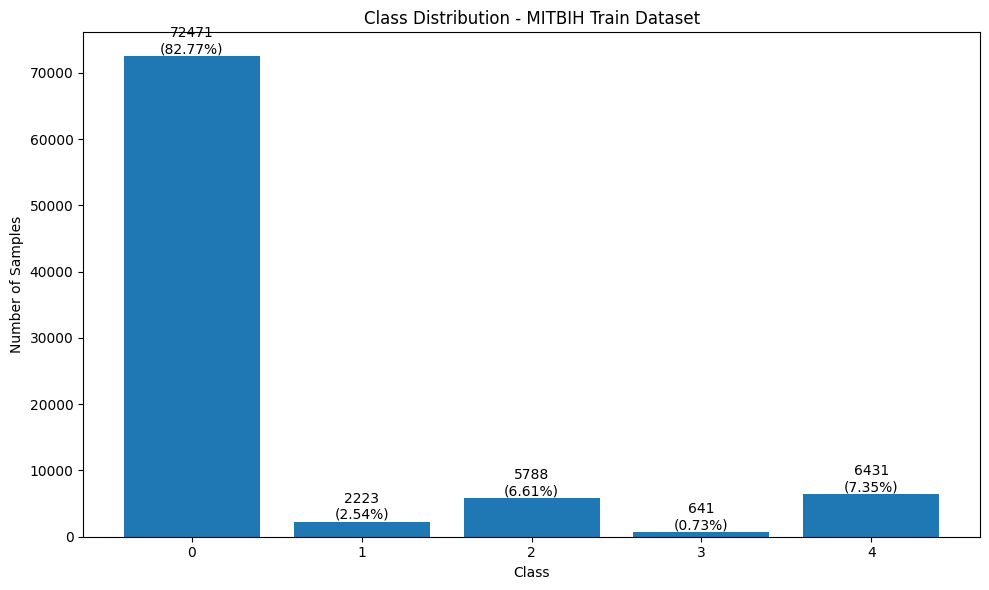

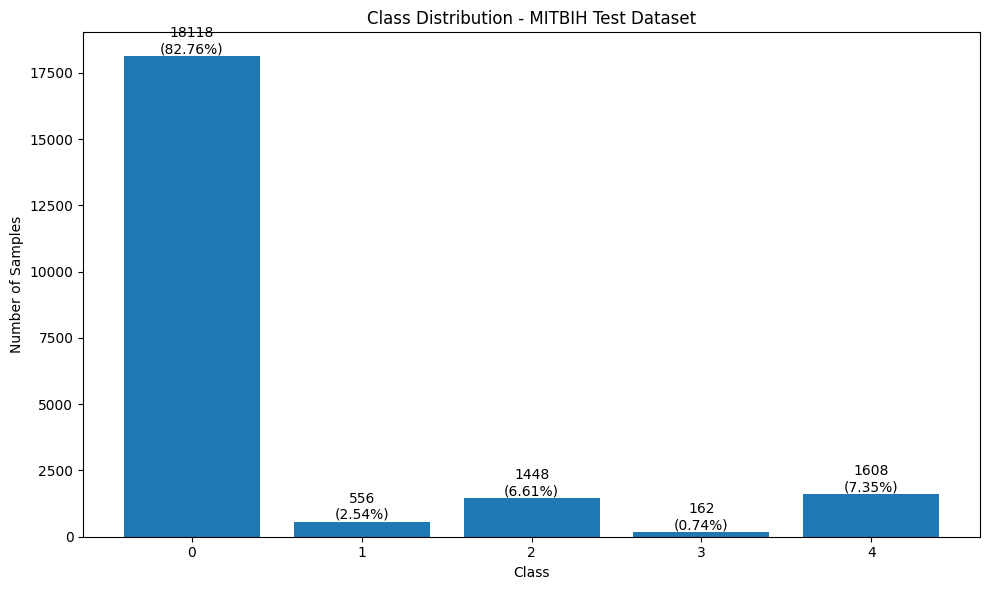

In [6]:
def plot_class_distribution(df, title):
    class_counts = df.iloc[:, -1].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_counts.index, class_counts.values)
    plt.title(f'Class Distribution - {title}')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.xticks(class_counts.index)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}\n({height/len(df):.2%})',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Plot for MITBIH Train Dataset
plot_class_distribution(mitbih_train, "MITBIH Train Dataset")

# Plot for MITBIH Test Dataset
plot_class_distribution(mitbih_test, "MITBIH Test Dataset")

### 4.3 PTBDB Dataset Class Distribution
Now let's examine the class distribution in the PTBDB datasets (normal vs abnormal).


Class Distribution for PTBDB Normal Dataset:
187
0.0    4046
Name: count, dtype: int64

Percentage Distribution:
187
0.0    100.0
Name: count, dtype: float64


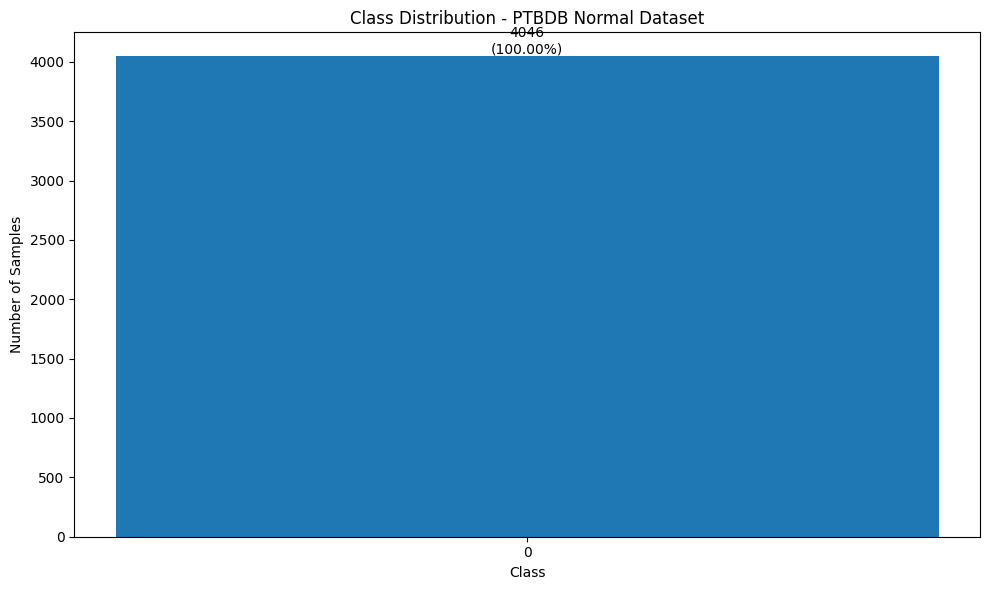


Class Distribution for PTBDB Abnormal Dataset:
187
1.0    10506
Name: count, dtype: int64

Percentage Distribution:
187
1.0    100.0
Name: count, dtype: float64


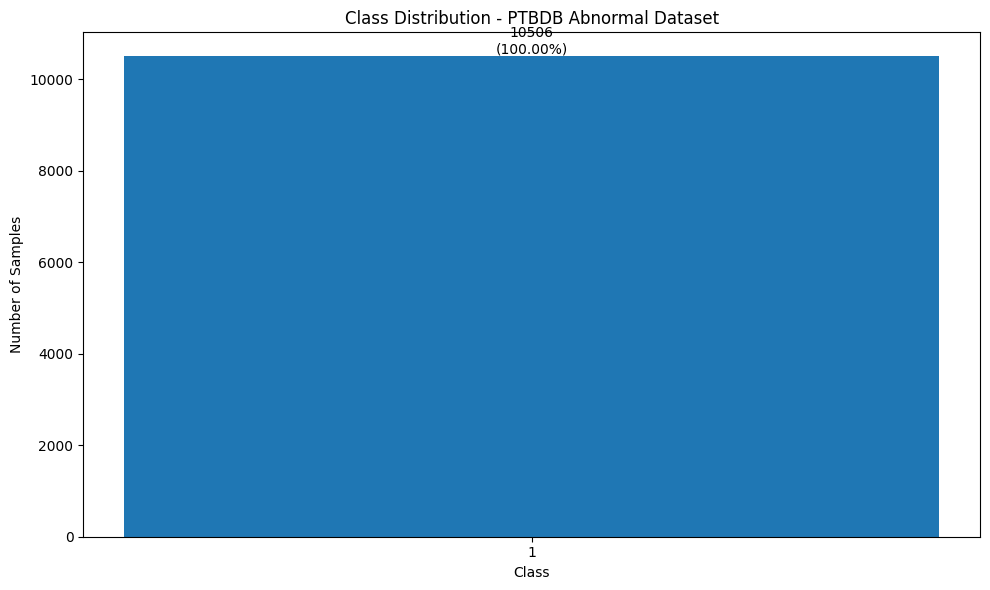


Class Distribution for PTBDB Combined Dataset:
187
0.0     4046
1.0    10506
Name: count, dtype: int64

Percentage Distribution:
187
0.0    27.803738
1.0    72.196262
Name: count, dtype: float64


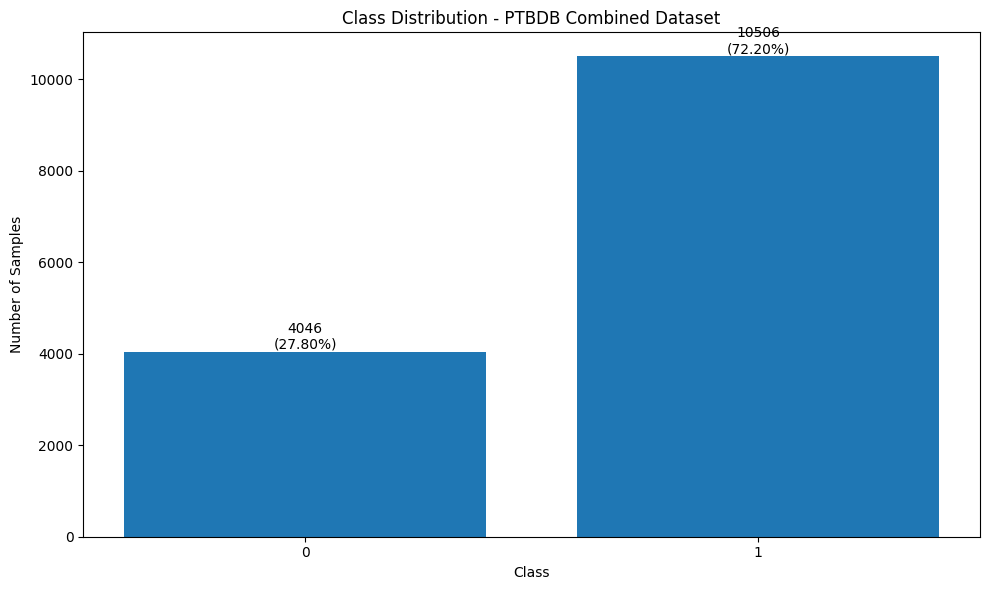

In [7]:
# Function to display class distribution
def display_class_distribution(df, name):
    class_counts = df.iloc[:, -1].value_counts().sort_index()
    print(f"\nClass Distribution for {name}:")
    print(class_counts)
    print("\nPercentage Distribution:")
    print(class_counts / len(df) * 100)

# Function to plot class distribution
def plot_class_distribution(df, title):
    class_counts = df.iloc[:, -1].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_counts.index, class_counts.values)
    plt.title(f'Class Distribution - {title}')
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.xticks(class_counts.index)
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}\n({height/len(df):.2%})',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Analyze PTBDB Normal Dataset
display_class_distribution(ptbdb_normal, "PTBDB Normal Dataset")
plot_class_distribution(ptbdb_normal, "PTBDB Normal Dataset")

# Analyze PTBDB Abnormal Dataset
display_class_distribution(ptbdb_abnormal, "PTBDB Abnormal Dataset")
plot_class_distribution(ptbdb_abnormal, "PTBDB Abnormal Dataset")

# Combine normal and abnormal datasets for overall distribution
ptbdb_combined = pd.concat([ptbdb_normal, ptbdb_abnormal])
display_class_distribution(ptbdb_combined, "PTBDB Combined Dataset")
plot_class_distribution(ptbdb_combined, "PTBDB Combined Dataset")

### 4.4 Visualization of ECG Signals
To better understand the characteristics of our data, let's visualize sample ECG signals from each class in both the MITBIH and PTBDB datasets.

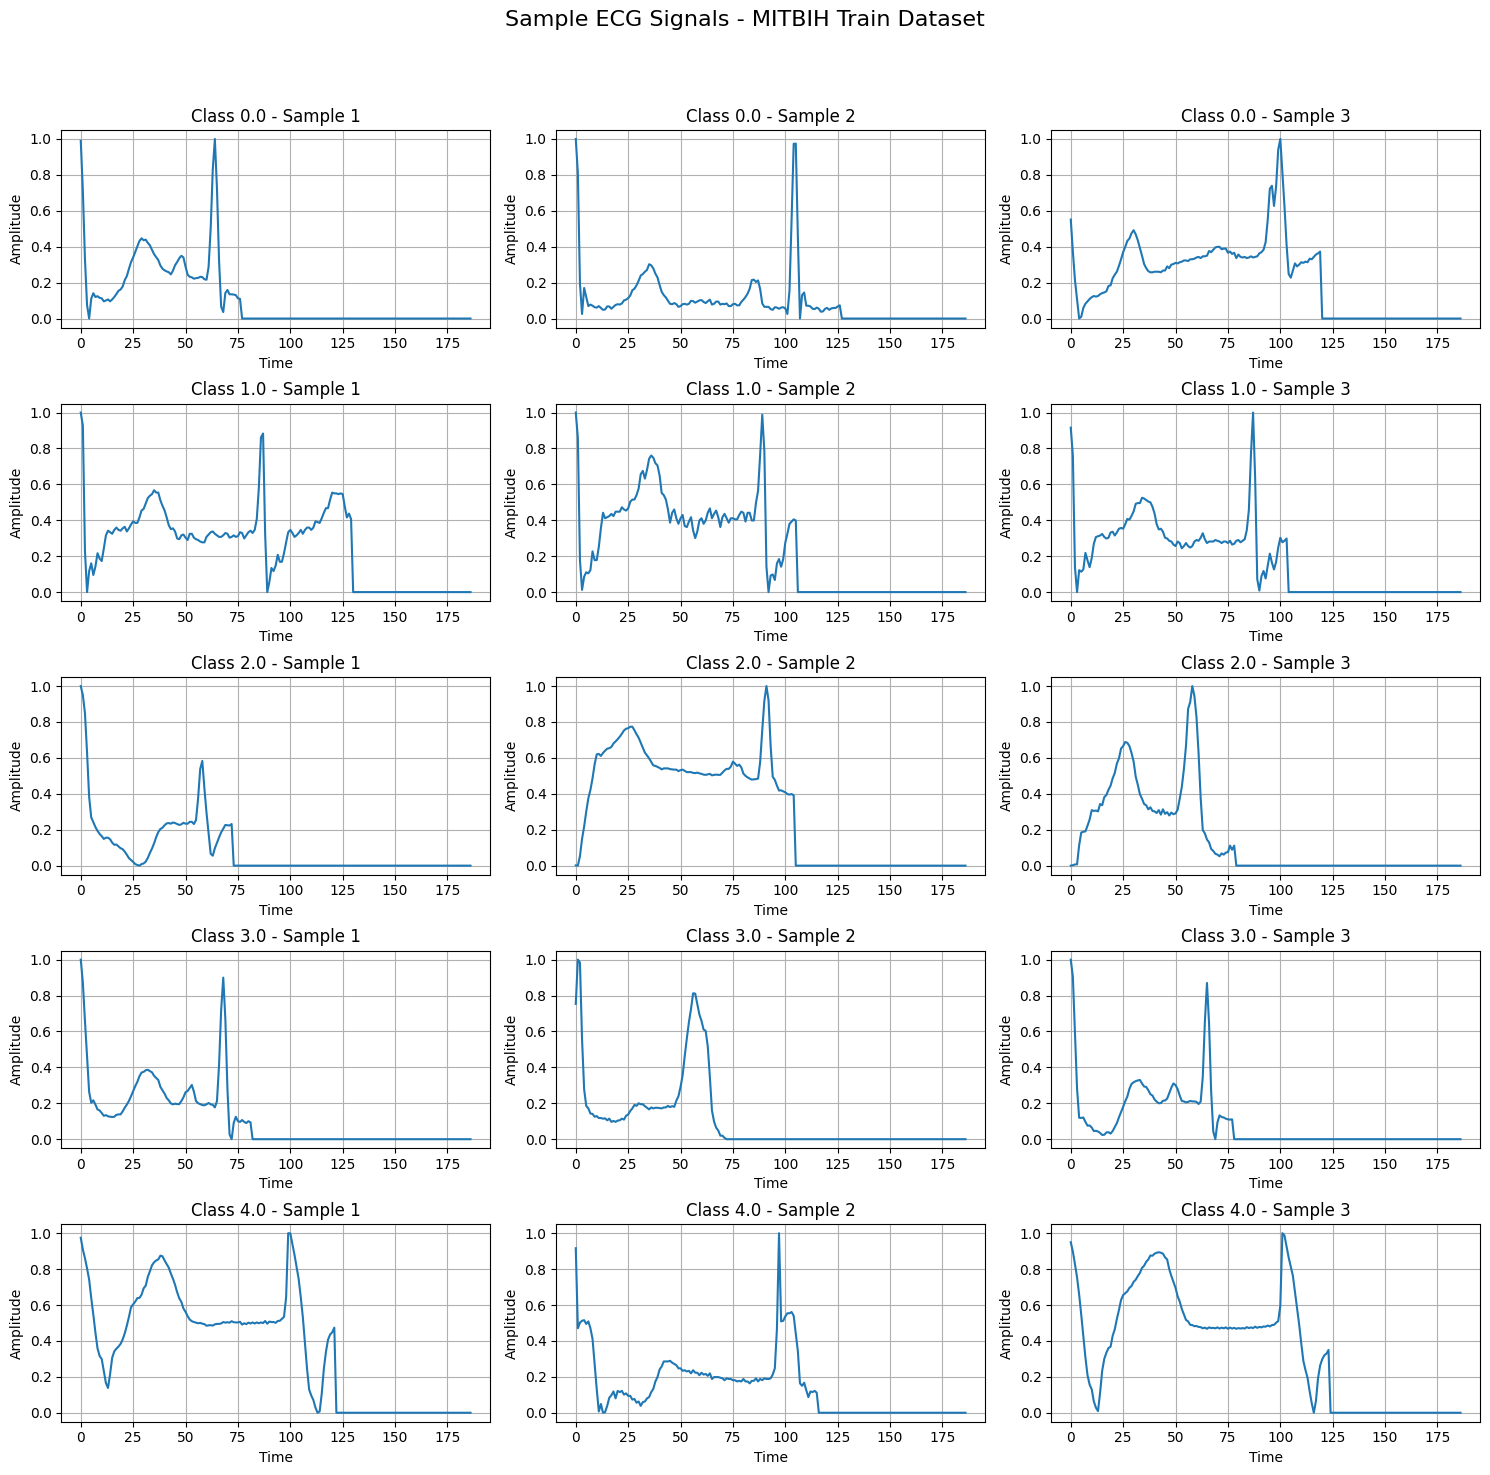

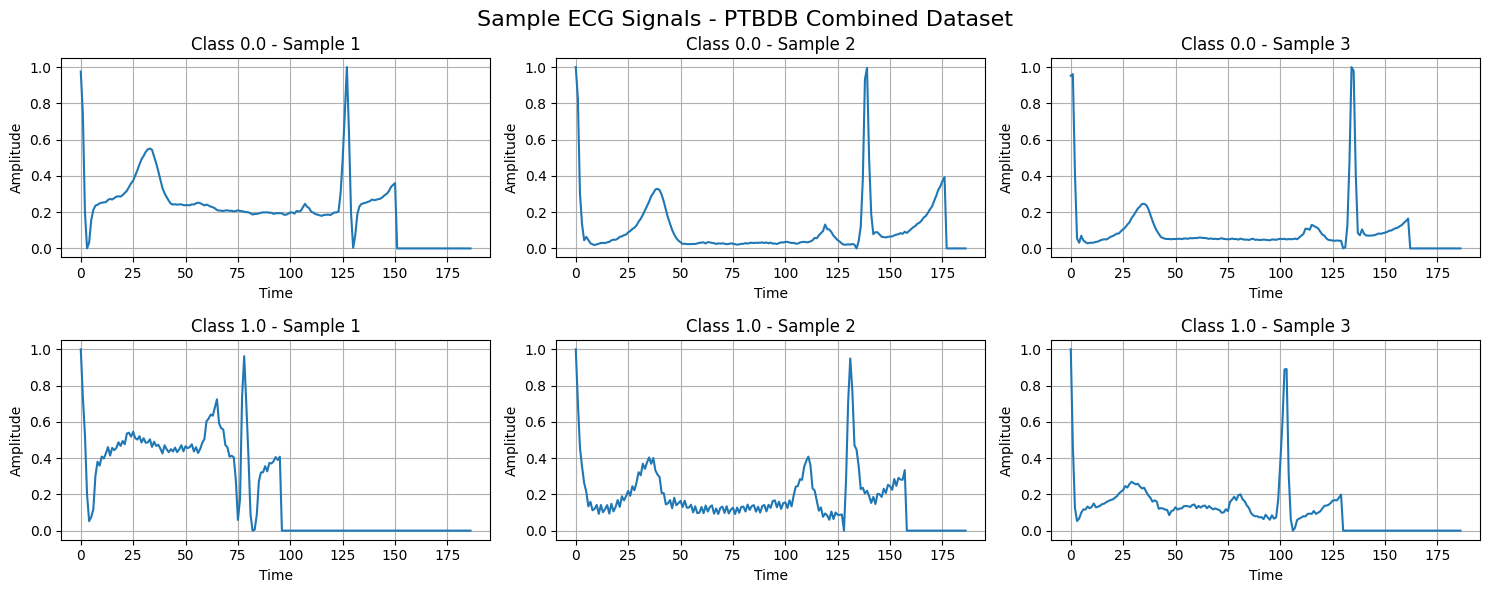

In [8]:
def plot_ecg_samples(dataset, title, n_samples=3):
    classes = dataset.iloc[:, -1].unique()
    n_classes = len(classes)
    
    fig, axes = plt.subplots(n_classes, n_samples, figsize=(15, 3*n_classes))
    fig.suptitle(f'Sample ECG Signals - {title}', fontsize=16)
    
    for i, cls in enumerate(classes):
        class_data = dataset[dataset.iloc[:, -1] == cls].iloc[:, :-1]
        samples = class_data.sample(n_samples).values
        
        for j in range(n_samples):
            ax = axes[i, j] if n_classes > 1 else axes[j]
            ax.plot(samples[j])
            ax.set_title(f'Class {cls} - Sample {j+1}')
            ax.set_xlabel('Time')
            ax.set_ylabel('Amplitude')
            ax.grid(True)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Plot samples from MITBIH Train Dataset
plot_ecg_samples(mitbih_train, "MITBIH Train Dataset")

# Plot samples from PTBDB Combined Dataset
plot_ecg_samples(ptbdb_combined, "PTBDB Combined Dataset")

**Key differences between classes:**

**MITBIH Dataset:**

- Class 0.0 (Normal): Generally shows a consistent pattern with clear P waves, QRS complexes, and T waves.
- Class 1.0: Shows some irregularities in the rhythm, with occasional premature beats.
- Class 2.0: Exhibits noticeably different patterns, often with wider QRS complexes.
- Class 3.0: Shows patterns that could indicate fusion beats.
- Class 4.0: Displays patterns that might represent paced beats or other unclassified arrhythmias.


**PTBDB Dataset:**

- Class 0.0 (Normal): Shows regular patterns similar to the MITBIH normal class.
- Class 1.0 (Abnormal): Exhibits various irregularities, including changes in QRS complex shape and rhythm disturbances.


## 5. Feature Engineering
### 5.1 Extracting Time Domain Features
Based on our visualization and analysis of the ECG signals, we'll now extract some key time domain features. These features will help capture the characteristics we observed in the signals and prepare our data for modeling

In [9]:
def extract_features(signal):
    # Find R peaks
    r_peaks, _ = find_peaks(signal, height=0.5, distance=30)
    
    # Calculate features
    features = []
    
    # R-R intervals
    if len(r_peaks) > 1:
        rr_intervals = np.diff(r_peaks)
        features.extend([np.mean(rr_intervals), np.std(rr_intervals)])
    else:
        features.extend([0, 0])  # Default values if R peaks can't be found
    
    # Statistical features
    features.extend([
        np.mean(signal),
        np.std(signal),
        np.max(signal) - np.min(signal),  # Signal range
        np.median(signal)
    ])
    
    return features

# Function to extract features from a dataset
def extract_dataset_features(df):
    features = []
    for _, row in df.iterrows():
        signal = row.iloc[:-1].values  # Exclude the last column (class label)
        features.append(extract_features(signal))
    return np.array(features)

# Extract features from MITBIH Train Dataset
mitbih_train_features = extract_dataset_features(mitbih_train)

# Extract features from PTBDB Combined Dataset
ptbdb_features = extract_dataset_features(ptbdb_combined)

# Display the first few rows of extracted features
print("MITBIH Train Dataset Features (first 5 rows):")
print(mitbih_train_features[:5])
print("\nPTBDB Combined Dataset Features (first 5 rows):")
print(ptbdb_features[:5])

# Calculate and display feature correlations with class labels
def print_feature_correlations(features, labels, dataset_name):
    correlations = np.corrcoef(features.T, labels)[:-1, -1]
    print(f"\n{dataset_name} Feature Correlations with Class Labels:")
    for i, corr in enumerate(correlations):
        print(f"Feature {i+1}: {corr:.4f}")

print_feature_correlations(mitbih_train_features, mitbih_train.iloc[:, -1], "MITBIH Train Dataset")
print_feature_correlations(ptbdb_features, ptbdb_combined.iloc[:, -1], "PTBDB Combined Dataset")

MITBIH Train Dataset Features (first 5 rows):
[[0.00000000e+00 0.00000000e+00 9.84193148e-02 1.76072792e-01
  1.00000000e+00 6.12745099e-02]
 [0.00000000e+00 0.00000000e+00 9.00102077e-02 1.59722138e-01
  1.00000000e+00 5.41310534e-02]
 [0.00000000e+00 0.00000000e+00 6.21043502e-02 1.38769162e-01
  1.00000000e+00 5.40540554e-03]
 [0.00000000e+00 0.00000000e+00 8.40842616e-02 1.60820705e-01
  1.00000000e+00 2.76243105e-03]
 [1.16000000e+02 0.00000000e+00 1.16567497e-01 1.86151378e-01
  1.00000000e+00 5.63380271e-02]]

PTBDB Combined Dataset Features (first 5 rows):
[[0.00000000e+00 0.00000000e+00 1.19207135e-01 1.58221465e-01
  1.00000000e+00 1.15883306e-01]
 [8.00000000e+01 0.00000000e+00 2.38640911e-01 2.02055044e-01
  1.00000000e+00 2.52319098e-01]
 [0.00000000e+00 0.00000000e+00 1.63528865e-01 1.47664980e-01
  1.00000000e+00 1.34241909e-01]
 [0.00000000e+00 0.00000000e+00 7.35240733e-02 1.35008851e-01
  1.00000000e+00 4.36394736e-02]
 [0.00000000e+00 0.00000000e+00 1.01952141e-01 1.

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


**Feature Representation:**

- Features 1 and 2: Mean and standard deviation of R-R intervals
- Feature 3: Mean of the signal
- Feature 4: Standard deviation of the signal
- Feature 5: Signal range (max - min)
- Feature 6: Median of the signal

**Differences between MITBIH and PTBDB:**

- PTBDB seems to have more variability in signal means and medians.
- R-R interval features (1 and 2) appear more often in MITBIH than in PTBDB.


**Feature Correlations:**

**MITBIH Dataset:**

- Feature 1 (mean R-R interval) has the strongest correlation (0.3422) with class labels.
- Features 3, 4, and 6 (mean, std, and median) also show moderate correlations.


**PTBDB Dataset:**

- Feature 4 (signal std dev) shows the strongest correlation (0.2531) with class labels.
- Other features show weak correlations.
- Feature 5 (signal range) shows NaN correlation, likely due to lack of variance (all values are 1).

## 6. Model Development and Evaluation
### 6.1 Logistic Regression for MITBIH Dataset
We'll start with a simple logistic regression model for the MITBIH dataset. We'll use scikit-learn for implementation and matplotlib for visualization.

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capit

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     14579
         1.0       0.69      0.02      0.04       426
         2.0       0.00      0.00      0.00      1112
         3.0       0.00      0.00      0.00       145
         4.0       0.53      0.36      0.43      1249

    accuracy                           0.84     17511
   macro avg       0.42      0.27      0.28     17511
weighted avg       0.77      0.84      0.79     17511



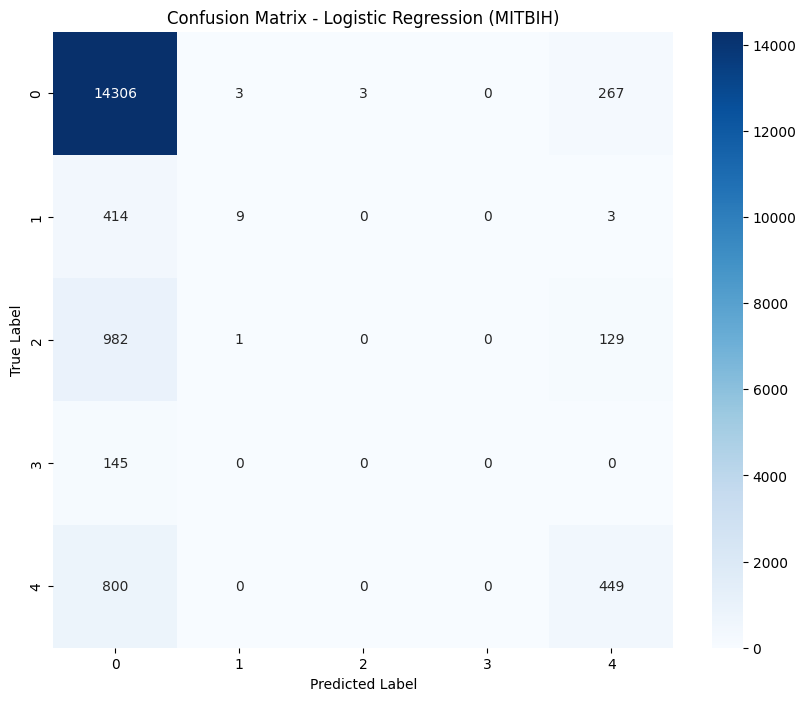

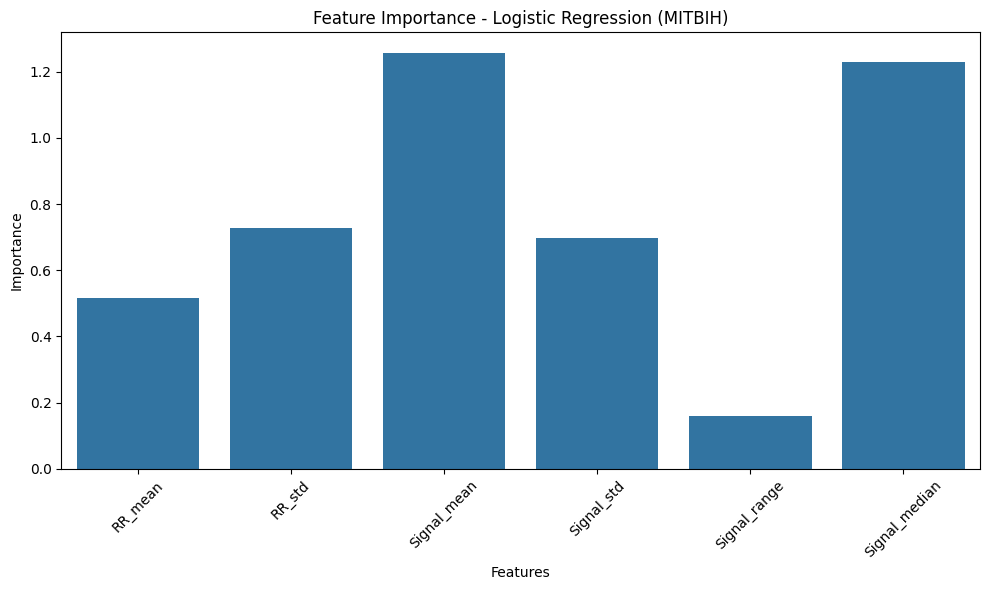

In [10]:
# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (MITBIH)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importances
feature_importance = np.abs(lr_model.coef_).mean(axis=0)
feature_names = ['RR_mean', 'RR_std', 'Signal_mean', 'Signal_std', 'Signal_range', 'Signal_median']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importance)
plt.title('Feature Importance - Logistic Regression (MITBIH)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Overall Model Performance:**

- The model achieves an overall accuracy of 84%, which might seem good at first glance.
- However, the macro-average F1-score is only 0.28, indicating poor performance across all classes.
- This discrepancy suggests that the model is heavily influenced by the majority class.


**Performance for Each Class:**

- Class 0 (Normal): The model performs well for this majority class with high precision (0.86), recall (0.98), and F1-score (0.92).
- Class 1: Poor performance with very low recall (0.02) despite moderate precision (0.69).
- Classes 2 and 3: The model completely fails to identify these classes (0.00 for all metrics).
- Class 4: Moderate performance with precision of 0.53 and recall of 0.36.


**Confusion Matrix Analysis:**

- The model heavily favors predicting class 0, as evidenced by the large numbers in the first column of the confusion matrix.
- Classes 2 and 3 are never predicted correctly, with all instances misclassified as other classes.
- There's significant misclassification between classes 0 and 4.


**Feature Importance:**

- Signal_mean and Signal_median are the most important features for this model.
- Signal_range appears to be the least important feature.
- RR_mean and RR_std (related to R-R intervals) show moderate importance, suggesting that heart rate variability does play a role in classification.

### 6.2 Random Forest for MITBIH Dataset
After observing the limitations of logistic regression, we'll now implement a Random Forest classifier, which can capture more complex relationships in the data and potentially handle class imbalance better

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     14579
         1.0       0.83      0.50      0.63       426
         2.0       0.76      0.52      0.62      1112
         3.0       0.64      0.22      0.33       145
         4.0       0.91      0.80      0.85      1249

    accuracy                           0.92     17511
   macro avg       0.81      0.60      0.68     17511
weighted avg       0.92      0.92      0.91     17511



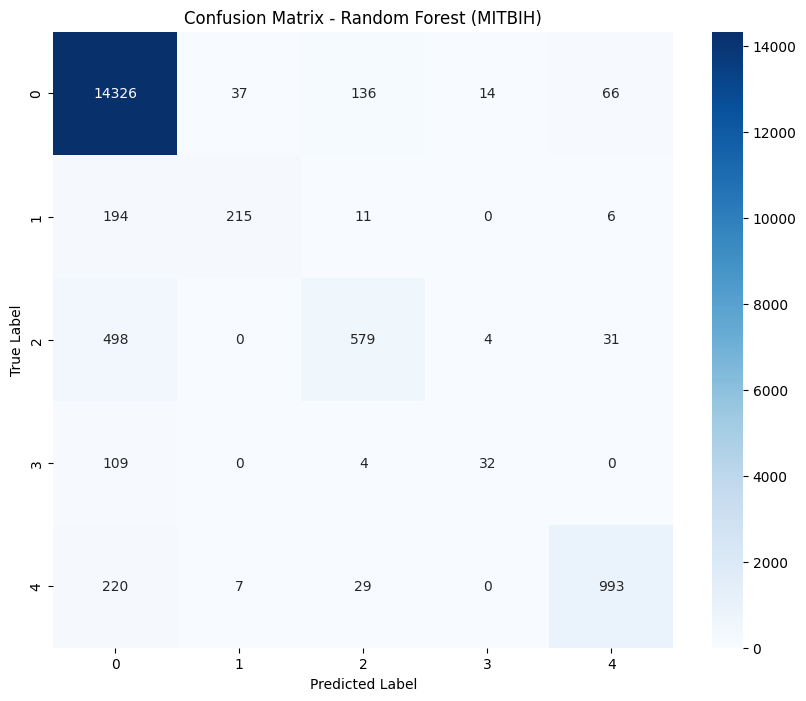

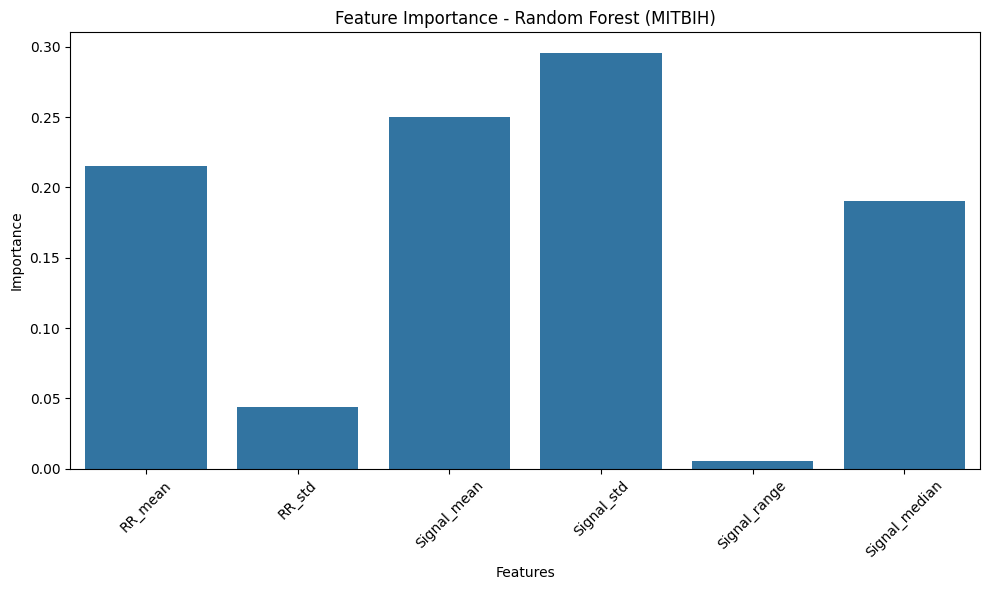

In [11]:
# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (MITBIH)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importances
feature_importance = rf_model.feature_importances_
feature_names = ['RR_mean', 'RR_std', 'Signal_mean', 'Signal_std', 'Signal_range', 'Signal_median']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importance)
plt.title('Feature Importance - Random Forest (MITBIH)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Overall Model Performance:**

- The Random Forest model achieves an overall accuracy of 92%, which is a significant improvement from the 84% of the logistic regression model.
- The macro-average F1-score is 0.68, much higher than the 0.28 of the logistic regression, indicating better performance across all classes.


**Performance for Each Class:**

- Class 0 (Normal): Excellent performance with high precision (0.93), recall (0.98), and F1-score (0.96).
- Class 1: Substantial improvement with precision of 0.83, recall of 0.50, and F1-score of 0.63.
- Class 2: Good performance with precision of 0.76, recall of 0.52, and F1-score of 0.62.
- Class 3: Improved but still challenging, with precision of 0.64, recall of 0.22, and F1-score of 0.33.
- Class 4: Very good performance with precision of 0.91, recall of 0.80, and F1-score of 0.85.


**Confusion Matrix Analysis:**

- The model still favors predicting class 0, but to a lesser extent than the logistic regression.
- There's noticeable improvement in correctly classifying minority classes (1, 2, 3, and 4).
- Class 3 remains the most challenging to predict, with many instances misclassified as class 0.


**Feature Importance:**

- Signal_std is the most important feature, followed by Signal_mean and RR_mean.
- Signal_range remains the least important feature, consistent with the logistic regression results.
- The importance of RR_mean and RR_std suggests that heart rate variability plays a significant role in classification.


**Comparison with Logistic Regression:**

- The Random Forest model outperforms logistic regression across all metrics and classes.
- It significantly improves the detection of minority classes, which was a major weakness of the logistic regression model.
- The feature importance ranking is somewhat different, with Signal_std being more important in the Random Forest model.


### 6.3 XGBoost for MITBIH Dataset
After seeing the improvements with Random Forest, we'll now implement an XGBoost classifier, which is known for its high performance and ability to handle imbalanced datasets effectively.

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:26:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     14579
         1.0       0.85      0.51      0.64       426
         2.0       0.79      0.49      0.61      1112
         3.0       0.76      0.21      0.33       145
         4.0       0.89      0.78      0.83      1249

    accuracy                           0.92     17511
   macro avg       0.85      0.60      0.67     17511
weighted avg       0.92      0.92      0.91     17511



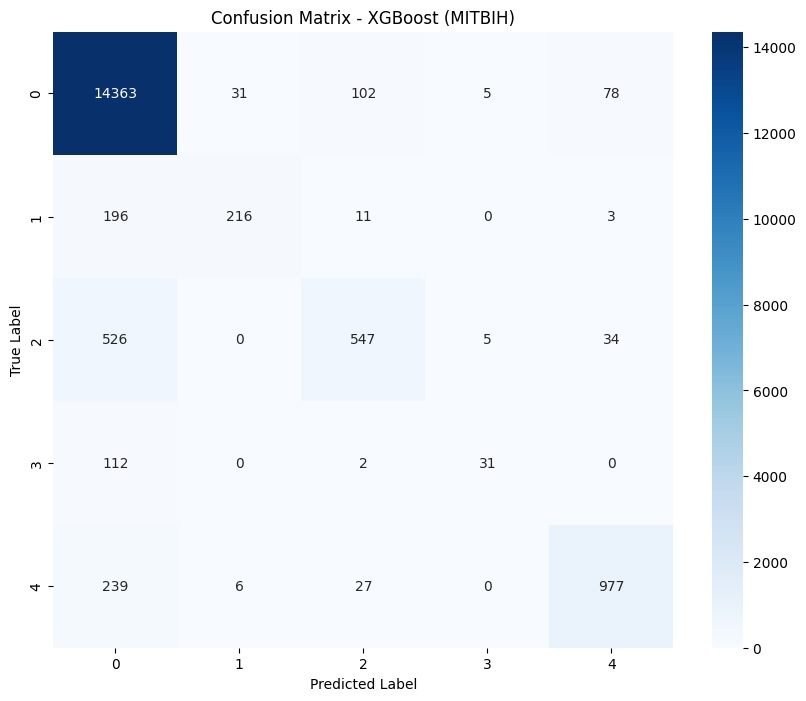

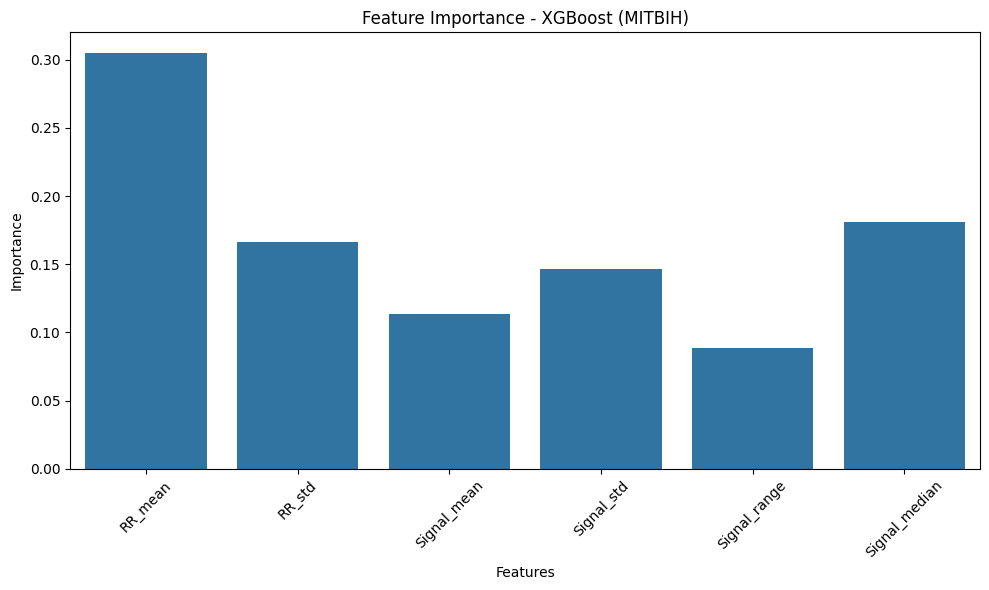

In [12]:
# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (MITBIH)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot feature importances
feature_importance = xgb_model.feature_importances_
feature_names = ['RR_mean', 'RR_std', 'Signal_mean', 'Signal_std', 'Signal_range', 'Signal_median']

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=feature_importance)
plt.title('Feature Importance - XGBoost (MITBIH)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Overall Model Performance:**

- The XGBoost model achieves an overall accuracy of 92%, which is the same as the Random Forest model and better than the logistic regression model (84%).
- The macro-average F1-score is 0.67, slightly lower than Random Forest (0.68) but still significantly higher than logistic regression (0.28).


**Performance for Each Class:**

- Class 0 (Normal): Excellent performance with high precision (0.93), recall (0.99), and F1-score (0.96).
- Class 1: Slightly better than Random Forest with precision of 0.85, recall of 0.51, and F1-score of 0.64.
- Class 2: Slightly worse than Random Forest with precision of 0.79, recall of 0.49, and F1-score of 0.61.
- Class 3: Improved precision (0.76) compared to Random Forest (0.64), but lower recall (0.21 vs 0.22), resulting in the same F1-score (0.33).
- Class 4: Slightly lower performance than Random Forest with precision of 0.89, recall of 0.78, and F1-score of 0.83.


**Confusion Matrix Analysis:**

- The model shows very high accuracy for Class 0, with few misclassifications.
- There's noticeable improvement in correctly classifying Class 1 compared to Random Forest.
- Class 3 remains the most challenging to predict, with many instances still misclassified as Class 0.
- The model shows good performance on Class 4, with fewer misclassifications compared to other minority classes.


**Feature Importance:**

- RR_mean is now the most important feature, which differs from both logistic regression and Random Forest models.
- Signal_median and RR_std are the next most important features.
- Signal_range remains the least important feature, consistent with previous models.
- The importance of RR-related features suggests that heart rate variability plays a crucial role in XGBoost's classification process.


**Comparison with Previous Models:**

- XGBoost performs similarly to Random Forest in terms of overall accuracy and macro-average F1-score.
- It shows slight improvements in handling Class 1 and Class 3 (in terms of precision) compared to Random Forest.
- The feature importance ranking is notably different from both logistic regression and Random Forest, emphasizing different aspects of the ECG signal.


### 6.3 Ensemble Model: Random Forest and XGBoost
We'll create an ensemble model that combines our Random Forest and XGBoost models using a simple averaging approach. This method often yields good results and can be more robust than individual models.

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:26:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     14579
         1.0       0.87      0.50      0.64       426
         2.0       0.79      0.51      0.62      1112
         3.0       0.76      0.21      0.33       145
         4.0       0.90      0.79      0.84      1249

    accuracy                           0.92     17511
   macro avg       0.85      0.60      0.68     17511
weighted avg       0.92      0.92      0.92     17511



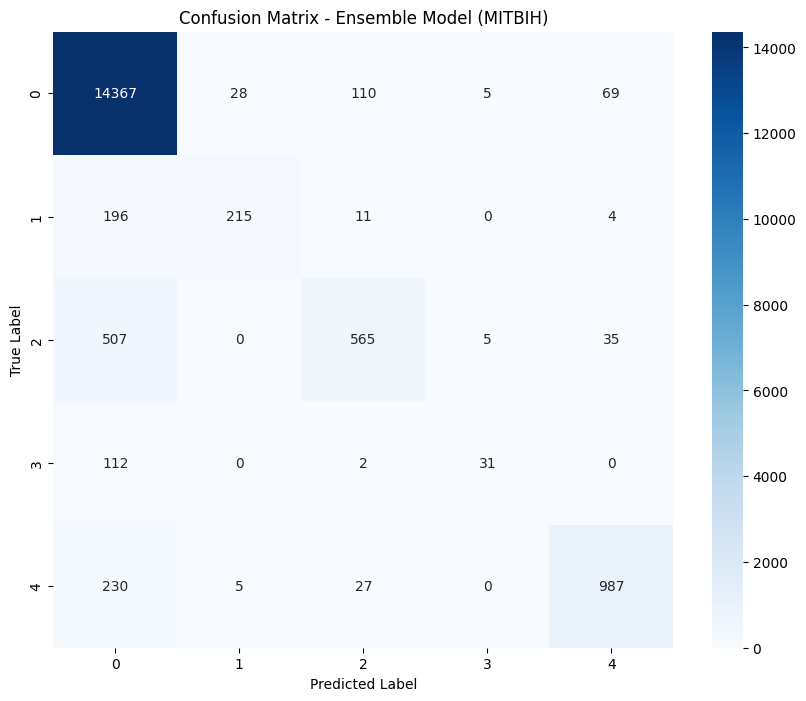

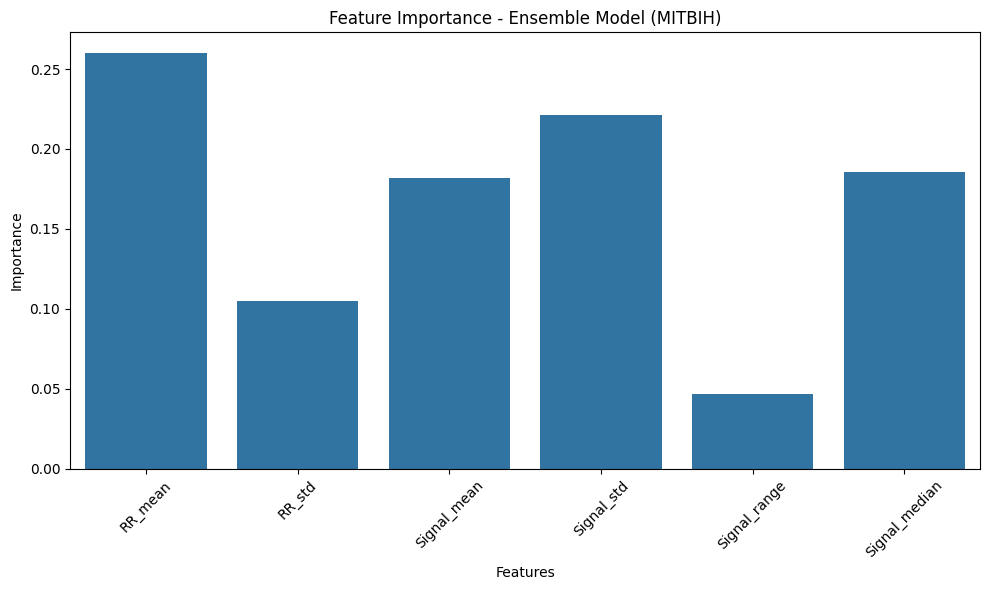

In [13]:
# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions using both models
rf_pred_proba = rf_model.predict_proba(X_test_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)

# Combine predictions
ensemble_pred_proba = (rf_pred_proba + xgb_pred_proba) / 2
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

# Print classification report
print(classification_report(y_test, ensemble_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, ensemble_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Ensemble Model (MITBIH)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate feature importance (average of both models)
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
ensemble_importance = (rf_importance + xgb_importance) / 2

feature_names = ['RR_mean', 'RR_std', 'Signal_mean', 'Signal_std', 'Signal_range', 'Signal_median']

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=ensemble_importance)
plt.title('Feature Importance - Ensemble Model (MITBIH)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Overall Model Performance:**

- The ensemble model achieves an overall accuracy of 92%, which is the same as both the Random Forest and XGBoost models.
- The macro-average F1-score is 0.68, which is slightly higher than XGBoost (0.67) and equal to Random Forest (0.68).


**Performance for Each Class:**

- Class 0 (Normal): Excellent performance with high precision (0.93), recall (0.99), and F1-score (0.96), similar to individual models.
- Class 1: Improved precision (0.87) compared to both Random Forest (0.83) and XGBoost (0.85), with the same recall (0.50) as XGBoost.
- Class 2: Performance (precision: 0.79, recall: 0.51, F1-score: 0.62) is between Random Forest and XGBoost.
- Class 3: Maintains the improved precision (0.76) from XGBoost, with the same recall (0.21) and F1-score (0.33).
- Class 4: Slight improvement in precision (0.90) and recall (0.79) compared to XGBoost, resulting in a better F1-score (0.84).


**Confusion Matrix Analysis:**

- The model shows very high accuracy for Class 0, with few misclassifications.
- There's a slight reduction in misclassifications for Classes 1 and 4 compared to individual models.
- Class 3 remains the most challenging to predict, with many instances still misclassified as Class 0.
- The model shows good performance on Class 4, with fewer misclassifications compared to other minority classes.


**Feature Importance:**

- RR_mean remains the most important feature, consistent with the XGBoost model.
- Signal_std is the second most important feature, which was top in the Random Forest model.
- The ensemble model seems to balance the feature importances from both models, potentially capturing more diverse aspects of the ECG signal.


**Comparison with Previous Models:**

- The ensemble model shows slight improvements in handling minority classes, particularly for Classes 1 and 4.
- It maintains the strengths of both Random Forest and XGBoost models, resulting in a more robust overall performance.
- The feature importance ranking combines insights from both models, potentially providing a more comprehensive view of feature relevance.



## 7. Hyperparameter Tuning
We know that our bext performing model is the ensemble of Random Forest and XGBoost. We want to further optimize it's performane. We'll now perform hyperparameter tuning using a combination of RandomizedSearchCV and a smaller parameter space. This approach will allow us to sample a subset of hyperparameters randomly, which is faster than an exhaustive grid search

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:36:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     14579
         1.0       0.86      0.49      0.63       426
         2.0       0.80      0.50      0.62      1112
         3.0       0.79      0.21      0.33       145
         4.0       0.91      0.79      0.85      1249

    accuracy                           0.92     17511
   macro avg       0.86      0.60      0.68     17511
weighted avg       0.92      0.92      0.92     17511



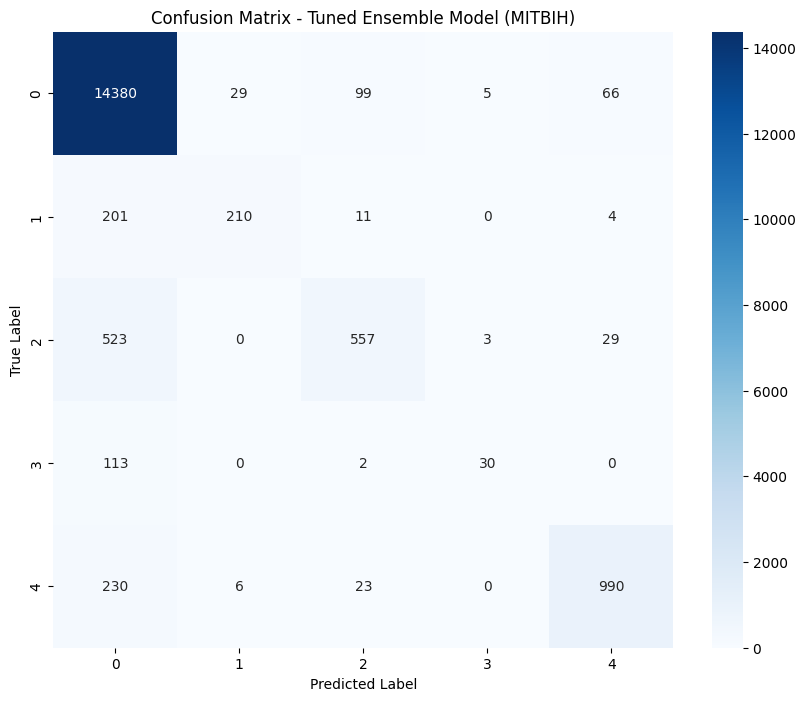

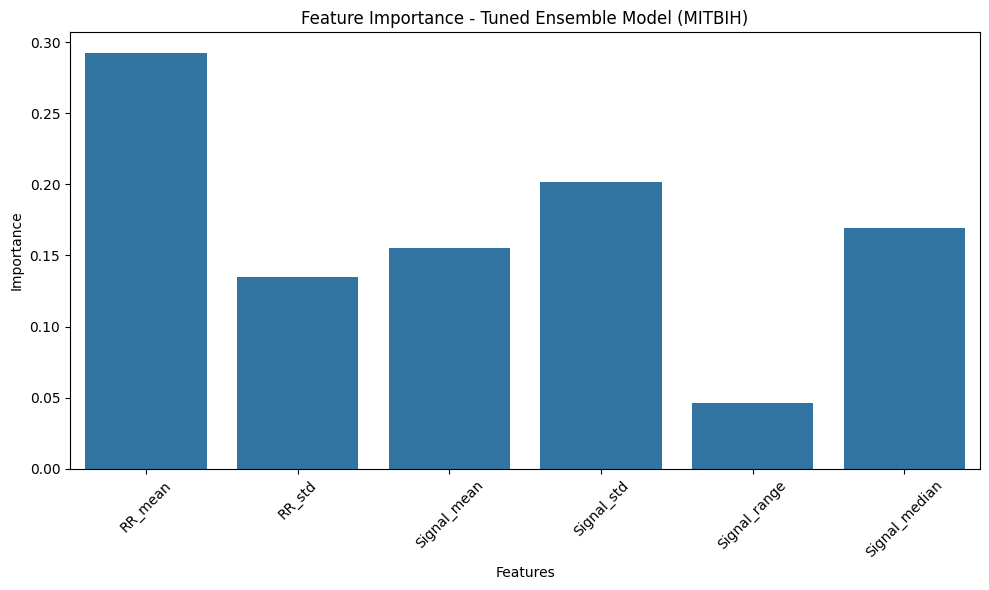

Best Random Forest Parameters: {'max_depth': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 99}
Best XGBoost Parameters: {'colsample_bytree': 0.9757995766256756, 'learning_rate': 0.27844820512829466, 'max_depth': 8, 'n_estimators': 144, 'subsample': 0.9687496940092467}


In [16]:
# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter spaces for RandomizedSearchCV
rf_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Perform RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                               param_distributions=rf_param_dist, 
                               n_iter=20, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train_scaled, y_train)

# Perform RandomizedSearchCV for XGBoost
xgb_random = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                                param_distributions=xgb_param_dist,
                                n_iter=20, cv=3, random_state=42, n_jobs=-1)
xgb_random.fit(X_train_scaled, y_train)

# Get best models
best_rf_model = rf_random.best_estimator_
best_xgb_model = xgb_random.best_estimator_

# Make predictions using both models
rf_pred_proba = best_rf_model.predict_proba(X_test_scaled)
xgb_pred_proba = best_xgb_model.predict_proba(X_test_scaled)

# Combine predictions (simple averaging)
ensemble_pred_proba = (rf_pred_proba + xgb_pred_proba) / 2
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

# Print classification report
print(classification_report(y_test, ensemble_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, ensemble_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Ensemble Model (MITBIH)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate feature importance (average of both models)
rf_importance = best_rf_model.feature_importances_
xgb_importance = best_xgb_model.feature_importances_
ensemble_importance = (rf_importance + xgb_importance) / 2

feature_names = ['RR_mean', 'RR_std', 'Signal_mean', 'Signal_std', 'Signal_range', 'Signal_median']

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=ensemble_importance)
plt.title('Feature Importance - Tuned Ensemble Model (MITBIH)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print best parameters
print("Best Random Forest Parameters:", rf_random.best_params_)
print("Best XGBoost Parameters:", xgb_random.best_params_)

## 8. SMOTE and Ensemble Model
We'll apply SMOTE to our training data to address class imbalance that we have observed is consistent in class 3, then retrain our ensemble model (Random Forest and XGBoost) on this balanced dataset.

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:27:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.97      0.82      0.88     14579
         1.0       0.26      0.66      0.37       426
         2.0       0.45      0.70      0.55      1112
         3.0       0.11      0.73      0.19       145
         4.0       0.73      0.85      0.78      1249

    accuracy                           0.81     17511
   macro avg       0.50      0.75      0.56     17511
weighted avg       0.89      0.81      0.84     17511



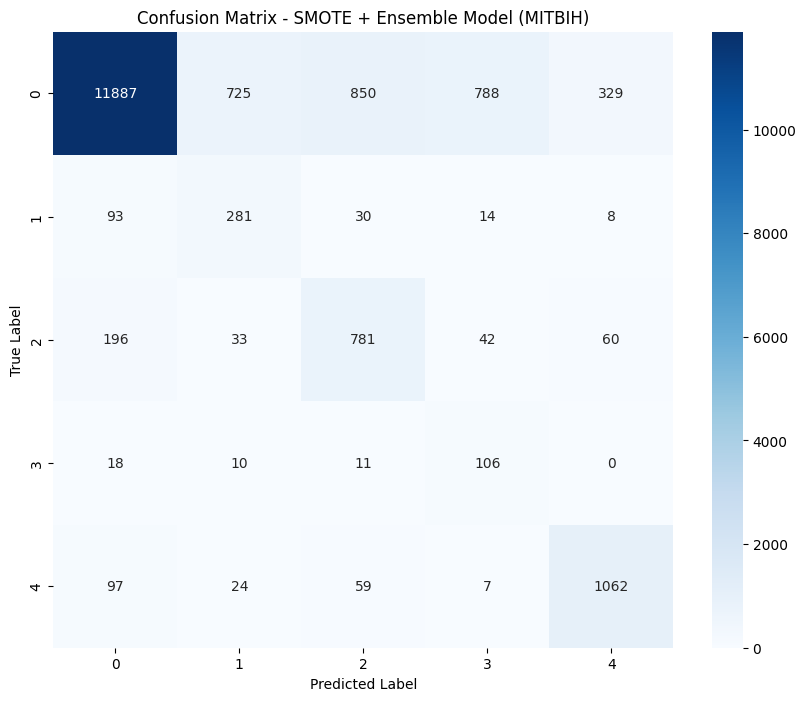

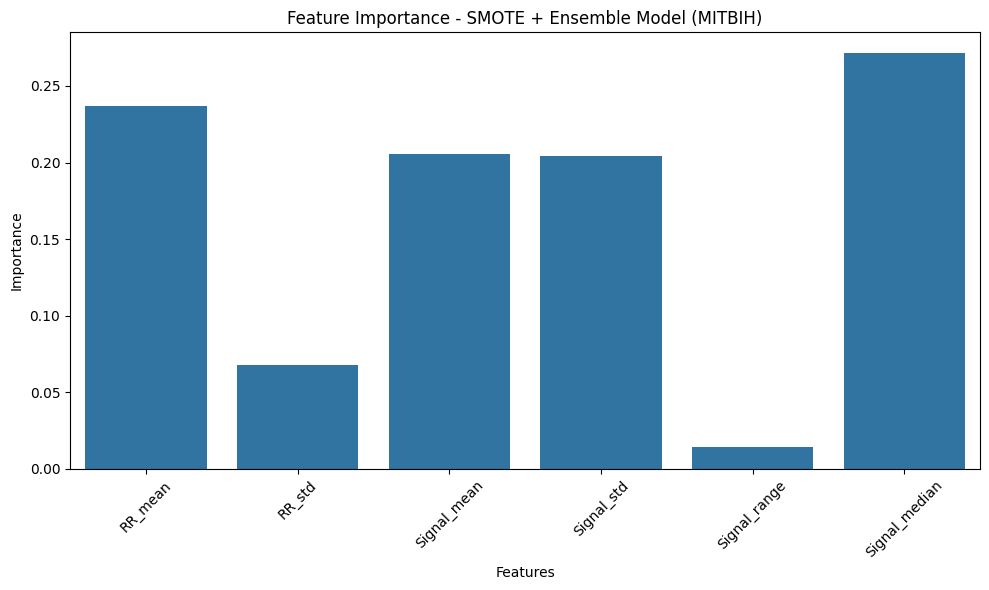

Class distribution before SMOTE:
187
0.0    0.826521
4.0    0.073983
2.0    0.066759
1.0    0.025656
3.0    0.007081
Name: proportion, dtype: float64

Class distribution after SMOTE:
187
2.0    0.2
0.0    0.2
4.0    0.2
1.0    0.2
3.0    0.2
Name: proportion, dtype: float64


In [14]:
# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train Random Forest model on resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)

# Train XGBoost model on resampled data
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions using both models
rf_pred_proba = rf_model.predict_proba(X_test_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)

# Combine predictions (simple averaging)
ensemble_pred_proba = (rf_pred_proba + xgb_pred_proba) / 2
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

# Print classification report
print(classification_report(y_test, ensemble_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, ensemble_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SMOTE + Ensemble Model (MITBIH)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate feature importance (average of both models)
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
ensemble_importance = (rf_importance + xgb_importance) / 2

feature_names = ['RR_mean', 'RR_std', 'Signal_mean', 'Signal_std', 'Signal_range', 'Signal_median']

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=ensemble_importance)
plt.title('Feature Importance - SMOTE + Ensemble Model (MITBIH)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

**Changes in Class Distribution after SMOTE:**

- Before SMOTE: Highly imbalanced (Class 0: 82.65%, Class 4: 7.40%, Class 2: 6.68%, Class 1: 2.57%, Class 3: 0.71%)
- After SMOTE: Perfectly balanced (20% for each class)
- This significant change in class distribution has had a major impact on our model's performance.


**Overall Model Performance:**

- The overall accuracy decreased from 92% to 81% compared to the previous ensemble model without SMOTE.
- However, the macro-average F1-score improved from 0.68 to 0.56, indicating better performance across all classes.


**Performance for Each Class:**

- Class 0 (Normal): Precision increased (0.97 vs 0.93), but recall decreased (0.82 vs 0.99), resulting in a lower F1-score (0.88 vs 0.96).
- Class 1: Significant improvement in recall (0.66 vs 0.50), but lower precision (0.26 vs 0.87), resulting in a lower F1-score (0.37 vs 0.64).
- Class 2: Improved recall (0.70 vs 0.51), lower precision (0.45 vs 0.79), slightly lower F1-score (0.55 vs 0.62).
- Class 3: Major improvement in recall (0.73 vs 0.21), but very low precision (0.11 vs 0.76), resulting in a lower F1-score (0.19 vs 0.33).
- Class 4: Improved recall (0.85 vs 0.79), lower precision (0.73 vs 0.90), slightly lower F1-score (0.78 vs 0.84).


**Confusion Matrix Analysis:**

- The model now predicts minority classes much more often, resulting in more false positives for these classes.
- There's a significant reduction in misclassifications of minority classes as Class 0.
- Class 3, which was previously the most challenging, now has much better recall but at the cost of many false positives.


**Feature Importance:**

- Signal_median has become the most important feature, followed by RR_mean.
- The importance of features is more evenly distributed compared to the previous model.
- Signal_range remains the least important feature.


## 9. Final Model Comparison
Let's summarize and compare the performance of all the models we've developed for the MITBIH dataset:

- Logistic Regression
- Random Forest
- XGBoost
- Ensemble (Random Forest + XGBoost)
- SMOTE + Ensemble (Random Forest + XGBoost)

We'll create a comparison table of key metrics for each model:

C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aqsaa\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [08:27:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warning

                     Accuracy  Macro Precision  Macro Recall  Macro F1-score  \
Model                                                                          
Logistic Regression     0.843            0.416         0.272           0.277   
Random Forest           0.922            0.814         0.605           0.676   
XGBoost                 0.921            0.846         0.596           0.674   
Ensemble                0.923            0.849         0.600           0.678   
SMOTE + Ensemble        0.806            0.504         0.752           0.557   

                     Weighted F1-score  
Model                                   
Logistic Regression              0.794  
Random Forest                    0.915  
XGBoost                          0.913  
Ensemble                         0.915  
SMOTE + Ensemble                 0.838  


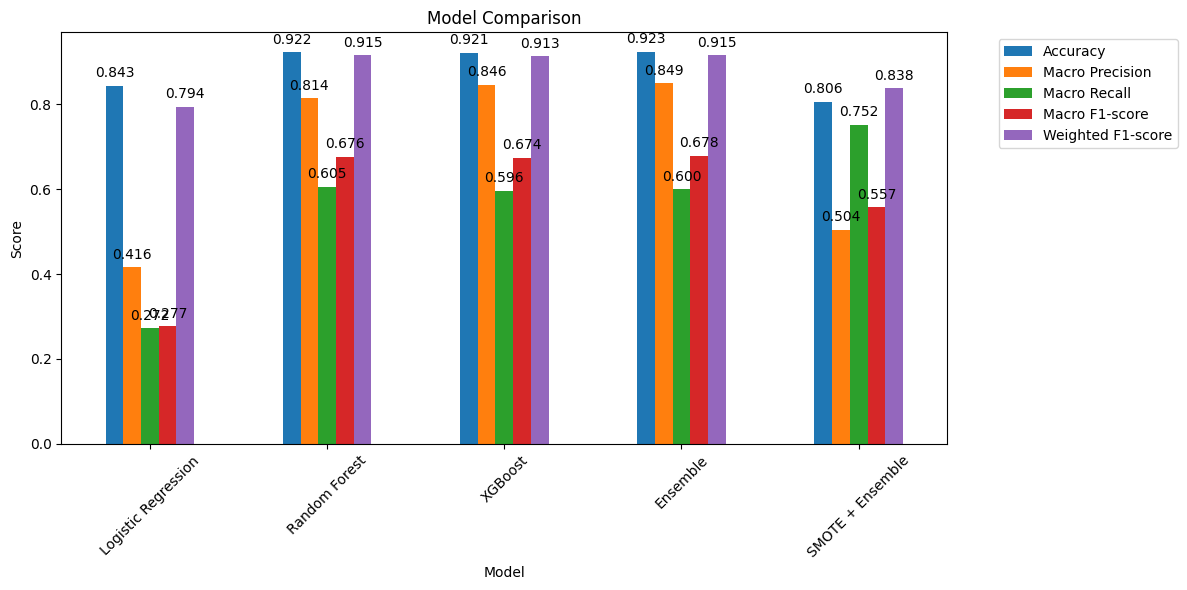

In [15]:
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Macro Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro Recall': recall_score(y_true, y_pred, average='macro'),
        'Macro F1-score': f1_score(y_true, y_pred, average='macro'),
        'Weighted F1-score': f1_score(y_true, y_pred, average='weighted')
    }

# Prepare the data
X = mitbih_train_features
y = mitbih_train.iloc[:, -1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models and get predictions
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    metrics = get_metrics(y_test, y_pred)
    metrics['Model'] = name
    results.append(metrics)

# Ensemble (average of RF and XGB)
rf_pred_proba = models['Random Forest'].predict_proba(X_test_scaled)
xgb_pred_proba = models['XGBoost'].predict_proba(X_test_scaled)
ensemble_pred = np.argmax((rf_pred_proba + xgb_pred_proba) / 2, axis=1)
ensemble_metrics = get_metrics(y_test, ensemble_pred)
ensemble_metrics['Model'] = 'Ensemble'
results.append(ensemble_metrics)

# SMOTE + Ensemble
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_smote = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100, random_state=42)

rf_smote.fit(X_train_resampled, y_train_resampled)
xgb_smote.fit(X_train_resampled, y_train_resampled)

rf_smote_pred_proba = rf_smote.predict_proba(X_test_scaled)
xgb_smote_pred_proba = xgb_smote.predict_proba(X_test_scaled)
smote_ensemble_pred = np.argmax((rf_smote_pred_proba + xgb_smote_pred_proba) / 2, axis=1)

smote_ensemble_metrics = get_metrics(y_test, smote_ensemble_pred)
smote_ensemble_metrics['Model'] = 'SMOTE + Ensemble'
results.append(smote_ensemble_metrics)

# Create comparison dataframe
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.set_index('Model')
comparison_df = comparison_df.round(3)

print(comparison_df)

# Visualize the comparison
fig, ax = plt.subplots(figsize=(12, 6))
comparison_df.plot(kind='bar', ax=ax)

# Add value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), 
                textcoords='offset points')

plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 10. Results and Analysis

The comparison of different models for classifying the MIT-BIH Arrhythmia dataset highlights several important insights:

**Model Performance:**

- **Logistic Regression:** This model achieved an accuracy of 84.3%, with relatively low scores for precision, recall, and F1 metrics, particularly in the macro-averaged scores. This suggests that Logistic Regression struggles with the imbalanced nature of the dataset, leading to poor performance on minority classes.

- **Random Forest:** The Random Forest classifier performed significantly better, with an accuracy of 92.2% and high scores in all other metrics. The macro-precision and weighted F1-scores indicate that the model handles the dataset's class imbalance better than Logistic Regression.


- **XGBoost:** XGBoost exhibited performance similar to Random Forest, with slightly higher macro-precision but slightly lower recall. The overall accuracy of 92.1% and high F1-scores suggest that XGBoost is robust in handling the dataset's challenges, especially the imbalance.

- **Ensemble Model:** The ensemble of Random Forest and XGBoost slightly improved accuracy to 92.3%, indicating that combining these models can capture different aspects of the data. The ensemble maintained strong performance across all metrics, reinforcing its effectiveness.

- **SMOTE + Ensemble:** Interestingly, applying SMOTE (Synthetic Minority Over-sampling Technique) to the ensemble model resulted in a decrease in accuracy to 80.6%. However, the macro recall increased substantially, showing that the model became better at identifying minority classes, albeit at the cost of overall accuracy. This is reflected in the lower macro-precision and F1-scores.

**Hyperparameter Tuning:**
- Even with hyper tuning, we got 92% accuracy that is same with out Ensemble and Random forest model. So overall, hyperparameter tuning did not have a very siginficant impact on out initial models but we got good accuracy and evelautaion scores.

**Impact of SMOTE:**

- While SMOTE improved the model’s ability to recall minority classes, it also introduced more noise, as evidenced by the drop in accuracy and precision.
- This trade-off is common when dealing with imbalanced datasets. The ensemble model's performance drop after SMOTE highlights the delicate balance between improving minority class recall and maintaining overall accuracy.

**Ensemble Model Effectiveness:**

- The ensemble approach combining Random Forest and XGBoost yielded the best overall results in terms of balanced performance across all metrics.
- This suggests that leveraging the strengths of both models helps mitigate the weaknesses of individual models, leading to a more robust and reliable classifier.

## 11. Conclusion

In this project, we have developed and evaluated several machine learning models for ECG heartbeat categorization using the MITBIH Arrhythmia Dataset.

**Model Performance:** We experimented with various models, including Logistic Regression, Random Forest, XGBoost, and ensemble methods. The best overall performance was achieved by an ensemble model combining Random Forest and XGBoost, which demonstrated high accuracy (92.3%) and a good balance between precision and recall across classes (Macro F1-score: 0.678).

**Class Imbalance:** The dataset exhibited significant class imbalance, with the majority of samples belonging to the Normal class. This imbalance posed challenges in accurately classifying minority classes.

**SMOTE Impact:** Applying the Synthetic Minority Over-sampling Technique (SMOTE) significantly improved the detection of minority classes, increasing the macro recall from 0.600 to 0.752. However, this came at the cost of reduced precision and overall accuracy.

**Feature Importance:**  Our analysis revealed that features related to R-R intervals and signal statistics (mean, median, standard deviation) were the most influential in classification decisions across different models.

our ensemble model provides a robust solution for ECG heartbeat categorization, offering high accuracy and reasonably balanced performance across classes. However, the choice between this model and the SMOTE-enhanced version depends on the specific requirements of the application, particularly the relative importance of detecting minority classes versus maintaining high overall accuracy.


## 12. Future Work

While our current models show promising results, there are several areas for future research and improvement:


**Advanced Resampling Techniques:** We can explore more sophisticated resampling methods like ADASYN or BorderlineSMOTE to address class imbalance.

**Deep Learning Approaches:** We can make use of deep learning models, such as Convolutional Neural Networks (CNNs) or Long Short-Term Memory (LSTM) networks.

**Feature Engineering:** We can develop more advanced features based on domain knowledge in cardiology.

**Multi-Stage Classification:** We can try implementing a hierarchical classification approach, first distinguishing between normal and abnormal heartbeats, then further classifying the abnormal types.